# Milestone 3

Stephanie Eordanidis.
Ravjot Sachdev,
Jackson Taber

Syracuse University : College of Engineering & Computer Science

223 Link Hall, Syracuse, NY 13244

sleordan@syr.edu, rssachde@syr.edu, jrtaber@syr.edu

CIS 700 Machine Learning and Security

06/16/2021


## Theme:
 “Adversarial Text Generation: Adversarial Machine Learning Applications in Text Analysis”

## Purpose:
The purpose of this lab is to add three new GAN metrics to the project space and successfully run them on the GAN used in previous milestones.

## Project:
Texygen is the name of the project selected. This project is a benchmarking tool that aids in text generation model research and testing. This tool allows for ease of various model testing to compare accuracy and synthetic data generation of models using same training baseline.

## (Hard/Soft)ware:
**Google Colaboratory**		https://colab.research.google.com/

**GPU**                     Python 3 Google Compute Engine backend

**Github**                  https://github.com/eordanis/CIS-700/

## Resources:
**Original Source:** 		https://github.com/geek-ai/Texygen

**Modified Sources Acquired:** 	2SU Course Files Section -> Texygenmaster_Python_3.6.zip

## Data:
The data for the selected project is setup as follows:

•	Generated data training: 5000 word and 20 sentence count

•	Oracle data generation: 10,000 sentence generation

•	Real data training:


*   image_coco : 20,000 sentences chosen from the image
 *   COCO captions data. 10,000 of which are used as training set while other 10,000 used as test set

*   eapoe : 266 sentences
 *  eapoe : 266 sentences Compiled from various Edgar Allan Po Poems found on referenced poem sight  [4].

## Modifications:
 To begin, the modified source code acquired from the 2SU application was further modified to combine the original intention of the origin source authors as well as professor modification. If no arguments are passed, all models/data are run.
 > **Note**: The order or model generation is done by first iterating over the GAN model type, then data type. If arguments are passed, those arguments will be validated and run accordingly to run a more targeted model test.

 Modifications were applied to eliminate much library warnings and informational messages as to keep output as clean as possible. File path naming was updated to be compliant with Google Colaboratory environment. All epoch time elapse console printing has been commented out for cleaner output reading.

 Additional modifications applied to this milestone were as follows:
 * Restructure of project for ease of use, updating of paths as needed
 * Redirect model output to the /save directory of the main project level instead of model level. Naming of output was also ensure to be unique
 * Three new GAN models were added to this project space



## Setup:
Due to the heft of processor/gpu usage, it was deemed necessary to run the project in the Google Colaboratory. Original attempt to run was done via Pycharm IDE Professional Edition with Anaconda derived environments, however this proved too great of a strain on the accessible workstation.

### Step 1
A new Google Colaboratory workspace was setup, titled “Milestone2”. This workspace was run using the hosted runtime environment. This document is the current document being read.

In order to run against provided code base, it was necessary to sync the colab workspace the github repository files as follows

```
!git clone https://$GITHUB_AUTH@github.com/eordanis/CIS-700/
```

Running this command from the first cell in the workbook syncs the drive to the github repo location of project location, as well as change to the necessary directory

In [ ]:
!git clone https://$GITHUB_AUTH@github.com/eordanis/CIS-700_clone/
%cd CIS-700_clone

### Step 2
Now it was necessary to import and download any missing libraries the hosted colaborartoy runtime did not have readily available via the following commands:
```
            !pip install -r "requirements.txt"
            import nltk
            nltk.download('punkt')
```
Running this command from the next cell in the workbook installed the necessary libraries and at specified versions for the project.


In [ ]:
!pip install -r "requirements.txt"
import nltk
nltk.download('punkt')

### Step 3
Now it is time to run the application. Below are two examples of commands to run the application.
```
!python3 "main.py"
```
This first command was run without parameters. In the case of this command, all trainings (SeqGAN, Gsgan, TextganMmd, Leakgan, Rankgan, Maligan, Mle) were run on all available defaulted training data (oracle LSTM, real data, CFG). Running this command can take around 2+ hours to complete.

```
!python3 "main.py" -g seqgan -t real
```

This second command was run with parameters. In the case of this command, main was run with SeqGAN training on image_coco. Running targeted trainings take less time to run, on average completing in 5-15 minutes depending on selected parameters. With the above selection, runtime was run above 10 minutes.

```
!python3 "main.py" -g seqgan -t real  -d data/eapoe.txt
```

This third command was run with parameters. In the case of this command, main was run with SeqGAN training on eapoe. Running targeted trainings take less time to run, on average completing in 5-15 minutes depending on selected parameters. With the above selection, runtime was run above 10 minutes.

> **NOTE:** For above estimates, based around 5 epochs. Additionally, CFG training appears to have stopped working suddenly, unsure why broken. Therefore running without that option for the time being. Additionally, the LeakGan model failed entirely to run now due to flag errors, so this model was discarded from testing.


## Process

When running the various models, there are similar steps for each.
1.	Beginning Training – begin model training(s)
2.	Set training - sets the desired model training method
3.	Start model pre-train generator – uses the training data to pre-train the generator model
4.	Start model pre-train discriminator - – uses the training data to pre-train the discriminator model
5.	Model adversarial training – runs the model to generate results based on the test data and metrics applied
6.	Finish Training – end of model training(s)

During training, each model training runs through several passes or epochs. For simplicity, base epoch is set to 5, with model training running thrice for 15 total epochs there abouts for each model trained on a particular data set.


## Metrics

**Abbreviations:**
*   BLEU 	- BiLingual Evaluation Understudy
*   GAN 	- Generative Adversarial Network
*   NLL 	- Negative Log-Likelihood
*   RL	- Reinforcement Learning

**Definitions**
*   EmbSim – influenced by BLEU, used instead to compare the word embeddings vs BLEU’s comparison of word similarity between two sentences or documents.
*   NLL-oracle : applied to synthetic data to determine fitting via oracle language model standards.
*   NLL-test : dual to NLL-Oracle, used to determine a model’s capability to fit to real test data

These measurement standards and more are discussed in the project directory’s “/docs/evaluation.md” location.


## Baseline Models

 For this report, the TextGAN and SeqGAN models were run on oracle and real training types in the previous project milestone and will be used as the baseline for new model comparisons. The real training types essentially runs the data against the image_coco.txt caption data. The TextGAN and SeqGAN was developed by the source project team to improve on existing GAN networks.

 With regards to TextGan, the goal of this model is to generate high quality realistic synthetic data while overcoming the convergence dilemma by using a generator that runs as a long short-term memory network and its discriminator a convolutional network. By matching high-dimension laten feature distributions of the testing and training data, this model over longer epochs has shown demonstrate a higher performance in quantitative evaluation, showing the TextGAN model can produce sentences that appear to have been written by a human, and not AI generated.

 For the SeqGAN model, this also proved successful in generating realistic looking sentences via this generator process. A second model was selected for comparison purposes. SeqGAN’s generator is based off the reinforcement learning stochastic policy, allowing SeqGAN to performing gradient policy update in order to circumvent differentiation issues in the generation. Its discriminator is run on complete sentences, and its results used as the reinforcement learning reward signal. According to source authors, this model boasted higher performance over others run.

## New Models

### **CGAN** - Conditional Generative Adversarial Network

Conditional adversarial network, or CGAN for short, is a basic modification of GAN that simply adds an additional layer that conditions both the descriminator and generator model layers. For this labs purposes, an existing GAN model was used as the base, and in both the Generator and Discriminator an embedded layer was incorporated as the first layer, used as the conditioning layer. For the sake of specificity, this GAN could actually be considered an CGSGAN, however for simplicity we will refer to is as simply CGAN.

### **INFOGAN**

InfoGan is an adjusted simple version of GAN that seeks to maximize the mutual information of a fixed subset of GAN noise varaibles. It is able to achieve this by having numerous convolution layers added to a regular implemtation of a GAN that are connected at the end, this makes the additional cost of computation low. For the use of this lab an existing GAN was used as the base and the convolution layers were added and connected at the end. 

### **DCGAN**

Deep convolutional generative adversarial networks (DCGANs) are a class of convolutional networks (CNNs) 
aimed to incorporate unsupervised learning. Some key components of the DCGAN architecture are the use of the Tanh activation function for the generator's output layer, LeakyReLU activation in the discriminator, and the removal of any fully connected hidden layers. With these features, the original study conducted was able to create a robust DCGAN, achieving an 82.8% accuracy on the on the CIFAR-10 image dataset.

## Testing

 Epochs were increased left to run at 5 for the sake of time. However, it is noted that as according to original project sourcing, >= 45 epochs for the models display the best NLL loss results on epochs > 40, prior to that point results would be poorer. NLL loss values are indicated to be better the lower they are, so if these values trend downward, the models are improving. For EmbeddedSimilarity, higher values are desired for better results.

### CGAN
The following commands are to run CGAN model on both oracle and real trainings.

**NOTE:** The real data essentially trained the model on the eapoe.txt data.
```
!python3 "main.py" -g cgan -t oracle
!python3 "main.py" -g cgan -t real
```

In [ ]:
!python3 "main.py" -g cgan -t oracle -d data/eapoe.txt

******** Beginning Training ********
set training
oracle
start pre-train generator:
nll-oracle
nll-test
EmbeddingSimilarity
nll-oracle
nll-test
EmbeddingSimilarity
epoch:1	nll-oracle:10.365934	nll-test:7.9890027	EmbeddingSimilarity:-0.13264132064913894	
start pre-train discriminator:
adversarial training:
nll-oracle
nll-test
EmbeddingSimilarity
epoch:6	nll-oracle:14.836451	nll-test:7.8124366	EmbeddingSimilarity:-0.12899664793612048	
nll-oracle
nll-test
EmbeddingSimilarity
epoch:10	nll-oracle:9.709798	nll-test:8.105871	EmbeddingSimilarity:-0.13109438098499476	
******** Completed Training ********



####Oracle Output
As we can see from the output above, over several loopthroughs, or epochs, the accuracy of the nll oracle and test values varied but appeared to having an upward trend in accuracy over epoch runs when running CGAN with oracle training. However, it is noted the embedded fell over time during the runs.
For training, it would yield better results to run higher epochs, such as 40, however for testing sake only 5 were run.

**Best Values**

*   NLL-oracle:             9.709798               @epoch 10
*   NLL-test:               7.8124366              @epoch 6
*   EmbeddingSimilarity:    -0.12899664793612       @epoch 6

In [ ]:
!python3 "main.py" -g cgan -t real -d data/eapoe.txt

******** Beginning Training ********
set training
real
start pre-train generator:
EmbeddingSimilarity
nll-test
EmbeddingSimilarity
nll-test
epoch:1	EmbeddingSimilarity:-0.3257110872329447	nll-test:6.7118287	
start pre-train discriminator:
adversarial training:
EmbeddingSimilarity
nll-test
epoch:6	EmbeddingSimilarity:-0.31586988051879566	nll-test:6.359037	
EmbeddingSimilarity
nll-test
epoch:10	EmbeddingSimilarity:-0.08581189503085304	nll-test:7.1510878	
******** Completed Training ********



####Real Output
As we can see from the output above, over several loopthroughs, or epochs, the accuracy of the nll values are also increase when running CGAN with real training. However, it is noted the embedded similarity fell over the course of the run. This indicates to us that the test_text.txt data generated should have closer similarity to the original eapoe.txt data file used to train the models.

For training, it would yield better results to run higher epochs, such as 40, however for testing sake only 5 were run.

**Best Values**

*   NLL-test:                6.359037              @epoch 6
*   EmbeddingSimilarity:    -0.085812              @epoch 10

### INFOGAN
The following commands are to run INFOGAN model on both oracle and real trainings.

> **NOTE:** The real data essentially trained the model on the eapoe.txt data.
```
!python3 "main.py" -g infogan -t oracle
!python3 "main.py" -g infogan -t real
```

In [ ]:
!python3 "main.py" -g infogan -t oracle -d data/eapoe.txt

******** Beginning Training ********
set training
oracle
start pre-train generator:
nll-oracle
nll-test
EmbeddingSimilarity
epoch:1	nll-oracle:10.742874	nll-test:7.5933557	EmbeddingSimilarity:-0.20757322466063718	
start pre-train discriminator:
adversarial training:
nll-oracle
nll-test
EmbeddingSimilarity
epoch:6	nll-oracle:10.20413	nll-test:7.031268	EmbeddingSimilarity:-0.20769521678846775	
nll-oracle
nll-test
EmbeddingSimilarity
epoch:10	nll-oracle:10.124441	nll-test:7.0572867	EmbeddingSimilarity:-0.20052312845326598	
******** Completed Training ********



#### Oracle Output
As we can see from the output above, over several loopthroughs, or epochs, the accuracy of the nll oracle and test values varied but leaned toward improvment when running INFOGAN with oracle training. Additionally, it is noted the embedded similarity is improving as well.

For training, it would yield better results to run higher epochs, such as 40, however for testing sake only 5 were run.

**Best Values**

*   NLL-oracle:             10.124441             @epoch 10
*   NLL-test:               7.031268              @epoch 6
*   EmbeddingSimilarity:    -0.20052312845326598  @epoch 10

In [ ]:
!python3 "main.py" -g infogan -t real -d data/eapoe.txt

******** Beginning Training ********
set training
real
start pre-train generator:
EmbeddingSimilarity
nll-test
epoch:1	EmbeddingSimilarity:-1.1401053379158488	nll-test:6.035058	
start pre-train discriminator:
adversarial training:
112.52452
EmbeddingSimilarity
nll-test
epoch:6	EmbeddingSimilarity:-0.7430809801654519	nll-test:3.865037	
33.357517
68.59142
68.35573
97.11515
EmbeddingSimilarity
nll-test
epoch:10	EmbeddingSimilarity:-0.7305529035011096	nll-test:4.139575	
******** Completed Training ********



#### Real Output
As we can see from the output above, over several loopthroughs, or epochs, the accuracy of the nll values are also increase when running INFOGAN with real training. Additionally, it is noted the embedded similarity is improving as well. This indicates to us that the test_text.txt data generated should have closer similarity to the original eapoe.txt data file used to train the models.

For training, it would yield better results to run higher epochs, such as 40, however for testing sake only 5 were run.


**Best Values**

*   NLL-test:               3.865037	           @epoch 6
*   EmbeddingSimilarity:    -0.7305529035011096  @epoch 10

### DCGAN
The following commands are to run DCGAN model on both oracle and real trainings.

> **NOTE:** The real data essentially trained the model on the eapoe.txt data.
```
!python3 "main.py" -g dcgan -t oracle
!python3 "main.py" -g dcgan -t real
```

In [4]:
!python3 "main.py" -g dcgan -t oracle

******** Beginning Training ********
Results output directory location set: results/
Epochs Set: 5
set training
oracle
start pre-train generator:
nll-oracle
nll-test
EmbeddingSimilarity
epoch:1	nll-oracle:10.742414	nll-test:7.593365	EmbeddingSimilarity:-0.20974108289176666	
start pre-train discriminator:
adversarial training:
nll-oracle
nll-test
EmbeddingSimilarity
epoch:6	nll-oracle:10.2014675	nll-test:7.0312963	EmbeddingSimilarity:-0.21080628049965836	
nll-oracle
nll-test
EmbeddingSimilarity
epoch:10	nll-oracle:10.112749	nll-test:7.0586023	EmbeddingSimilarity:-0.20422852256494423	
******** Completed Training ********



#### Oracle Output
As we can see from the output above, over several loopthroughs, or epochs, the accuracy of the nll oracle and test values varied but leaned toward improvment when running DCGAN with oracle training. Additionally, it is noted the embedded similarity is improving as well.

For training, it would yield better results to run higher epochs, such as 40, however for testing sake only 5 were run.

**Best Values**

*   NLL-oracle:             10.112749             @epoch 10
*   NLL-test:               7.0312963              @epoch 6
*   EmbeddingSimilarity:    -0.20422852256494423    @epoch 6

In [5]:
!python3 "main.py" -g dcgan -t real -d data/eapoe.txt

******** Beginning Training ********
Results output directory location set: results/
Epochs Set: 5
set training
real
start pre-train generator:
EmbeddingSimilarity
nll-test
epoch:1	EmbeddingSimilarity:-1.1492291574337352	nll-test:6.0749707	
start pre-train discriminator:
adversarial training:
EmbeddingSimilarity
nll-test
epoch:6	EmbeddingSimilarity:-0.8131079287120885	nll-test:4.1213984	
EmbeddingSimilarity
nll-test
epoch:10	EmbeddingSimilarity:-0.7482284949507192	nll-test:4.258227	
******** Completed Training ********



#### Real Output
As we can see from the output above, over several loopthroughs, or epochs, the accuracy of the nll values are also increase when running DCGAN with real training. Additionally, it is noted the embedded similarity is improving as well. This indicates to us that the test_text.txt data generated should have closer similarity to the original eapoe.txt data file used to train the models.

For training, it would yield better results to run higher epochs, such as 40, however for testing sake only 5 were run.


**Best Values**

*   NLL-test:               4.1213984	           @epoch 6
*   EmbeddingSimilarity:    -0.7482284949507192  @epoch 10

## Results Comparision

Below sections are broken down into Data and Visual Representations of the results testing of models.

### Data Representation

#### Oracle Data
 When comparing oracle data metrics between the two models baseline modes and three newly implemented models, the results are as follows:

**TextGAN Best Values**

*   NLL-oracle:             11.898141             @epoch 10
*   NLL-test:               36.785576             @epoch 6
*   EmbeddingSimilarity:    -0.198190311710986    @epoch 1

**SeqGAN Best Values**

*   NLL-oracle:             10.114458             @epoch 10
*   NLL-test:               7.031317              @epoch 6
*   EmbeddingSimilarity:    -0.207636699321102    @epoch 10

**CGAN Best Values**

*   NLL-oracle:             9.709798             @epoch 10
*   NLL-test:               7.8124366              @epoch 6
*   EmbeddingSimilarity:    -0.12899664793612       @epoch 6

**INFOGAN Best Values**

*   NLL-oracle:             10.124441             @epoch 10
*   NLL-test:               7.031268              @epoch 6
*   EmbeddingSimilarity:    -0.20052312845326598  @epoch 10

**DCGAN Best Values**

*   NLL-oracle:             10.112749             @epoch 10
*   NLL-test:               7.0312963              @epoch 6
*   EmbeddingSimilarity:    -0.20422852256494423    @epoch 6

#### Real Data
When comparing real data metrics between the two models baseline modes and three newly implemented models, the results are as follows:

**TextGAN Best Values**

*   NLL-test:               37.6404             @epoch 10
*   EmbeddingSimilarity:    -0.369170747866734  @epoch 1

**SeqGAN Best Values**

*   NLL-test:               3.4653516	           @epoch 10
*   EmbeddingSimilarity:    0.510576256396731  @epoch 10

**CGAN Best Values**

*   NLL-test:                6.359037              @epoch 6
*   EmbeddingSimilarity:    -0.085812              @epoch 10

**INFOGAN Best Values**

*   NLL-test:               3.865037	           @epoch 6
*   EmbeddingSimilarity:    -0.7305529035011096  @epoch 10

**DCGAN Best Values**

*   NLL-test:               4.1213984	           @epoch 6
*   EmbeddingSimilarity:    -0.7482284949507192  @epoch 10

Here we will take a look at the first 15 lines of the real data files, both training/test [eapoe.txt / test_eapoe.txt] and synthetic data generation from the model labeled test_file.txt

### Visual Representation
This sections provides a more visual representation of results and comparative data

In [4]:
import utils.visual as vis

vis.display_synth_data()


,textgan real Synth Data
0,depth dirges dirges haunted- footfalls bust footfalls thee- followed stately footfalls footfalls yore- mortal louder footfalls footfalls cushion gently dirges gently dirges
1,for lies curious denser curious cushion curious ember curious further denser ember grim ! ember burning sorrow- laden ! grave laden stately
2,yore- whether footfalls yore- lies lies our sent echo sorrow- 't visitor ebony sorrow- plutonian plainly sorrow- bust 'never- sorrow- meaning- surcease
3,silken shore- parting sent footfalls yore- curtain yore- gently yore- louder haunted- gently answer answer answer than utters lady for for for
4,yore- him footfalls ebony above sorrow- been gently hesitating ember 'never- 'never- to hesitating lady autumn sorrow- ebony echo help grim ashore
,seqgan real Synth Data
0,"nameless which sky stormy bore- explore heaven gently press louder lov his flirt ,"
1,before- silence now press doubtless is quit made distant of chamber -- did and
2,stock countenance black burning rustling throws explore lent he word of above sought by
3,divining scarcely by him explore implore- countenance reclining is : dreary answer `` not


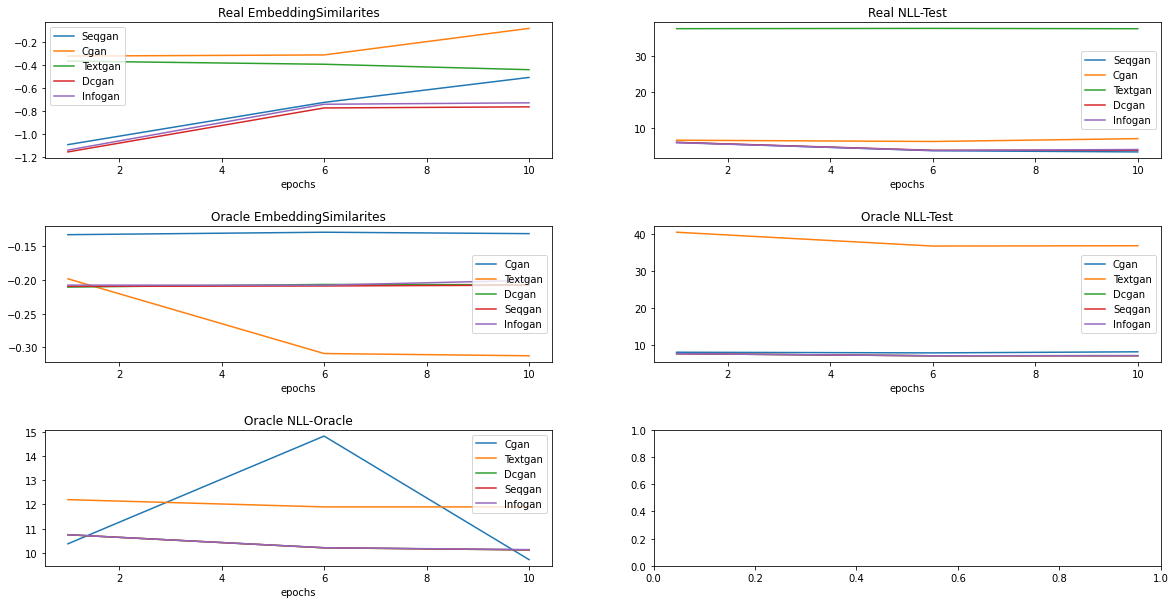

In [7]:
# Plot the metric charts 
vis.display_metrics()

## Observations
The graphs above help visualize the performances of the various GAN models with both oracle and real training. Each of our 3 models seemed to perform much better than TextGan in the NLL-Test with both Oracle and real training, as well as under the Embedding Similarity metric with Oracle training. Another interesting note is that CGan's performance seems to improve quite a bit under adversarial training under the Embedding Similarity Metric with real training, while InfoGan and TextGan seems to perform worse in the same measure. Similarly, as the number of epochs increases, CGan's performances eclipses those of the other 4 models under the NLL measure with Oracle training. Of course, these metrics are only measured across 5 epochs, so it'd be helpful to see how the models perform given more time. But we can still use this information to get a better understanding of each model's performance.

## Notes
 This project was a collaborative effort by all team members listed in top of document. Project was developed/run/tested while on video call as a team effort. All parties put forth equal effort in testing, data selection and stripping, as well as understanding content.

 >**Note:** please refer to Team Project Documentation\MileStone2\Stephanie_Jackson_Ravjot_CIS700_M2_Contribution.txt for more contribution details

Given the short duration of setup, running, etc there was not sufficient time to truly understand each of the models under the project. Two models from the previous milestone were used as the benchmark for comparison with the three newly incorporated models added with this milestone. However more time would be require for all encompassing tasking to really dive in and understand these models, and to run over longer epochs to see more concrete data results and comparisons. Additionally it should be noted the amount of time it takes to run these models with higher epoch values. Running the full models over and over can help training, however can take hours to complete. Furthermore, the .csv files were not populating. Given more time dedicate to this project, issues may have been able to be resolved

##Reference
[1] Geek-Ai. “Texygen by Geek.AI.” GitHub, 2017, github.com/geek-ai/Texygen.

[2] Yu, Lantao, et al. “SeqGAN: Sequence Generative Adversarial Nets with Policy Gradient.” ArXiv.org, 25 Aug. 2017, arxiv.org/abs/1609.05473.

[3] Zhang, Yizhe, et al. “Adversarial Feature Matching for Text Generation.” ArXiv.org, 18 Nov. 2017, arxiv.org/abs/1706.03850.

[4] Chen, Xi, Duan, Yan, Houthooft, Rein, Schulman, John,
Sutskever, Ilya, and Abbeel, Pieter. Infogan: Interpretable representation learning by information maximizing generative adversarial nets. arXiv preprint
arXiv:1606.03657, 2016a.

[5] EA Poem Source.  https://poestories.com/read/valentine

[6] Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks
https://arxiv.org/abs/1511.06434

In [10]:
#PDF/HTML conversion of notebook
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
!jupyter nbconvert --output-dir='results/' --to PDF "main.ipynb"
!jupyter nbconvert --output-dir='results/' --to HTML "main.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
texlive is already the newest version (2017.20180305-1).
texlive-latex-extra is already the newest version (2017.20180305-2).
texlive-xetex is already the newest version (2017.20180305-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the err